# <center> 👉 class_03_3 IP » _Changing Colorspaces - BGR, RGB, HSV, YUV_ </center>

### » English (all) and Korean (some) for better understandings

In this class, you will learn how to convert images from one color-space to another, like BGR-> Gray, BGR -> HSV etc.
In addition to that, we will create an application which extracts a colored object in a image
You will learn following functions : cv2.cvtColor(), cv2.inRange() etc.

## Changing Colorspaces     

There are more than 150 color-space conversion methods available in OpenCV.   
But we will look into some of which are most widely used ones, BGR -> Gray and BGR -> HSV, and some more.

For color conversion, we use the function **cv2.cvtColor(input_image, flag)** where flag determines the type of conversion.  
- For BGR -> Gray conversion we use the flags cv2.COLOR_BGR2GRAY.   
- Similarly for BGR -> HSV, we use the flag cv2.COLOR_BGR2HSV.   
To get other flags, just run following commands in your Python terminal :  
    
👉➡️[Color Space Conversions](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#gga4e0972be5de079fed4e3a10e24ef5ef0a353a4b8db9040165db4dacb5bcefb6ea)    

In [ ]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags) # more than 150 color-space conversion methods

## ▶ BGR, BGRA

● There is a method of expressing colors in the RGB (Red, Green, Blue) method.
- It is a method of mixing three colors of light, red, green, and blue to create the desired color.
- Each color is displayed as a value between 0~255, and the larger the value, the brighter the light of that color.  

>● 색상을 표현하는 방법으로는 RGB(Red, Green, Blue) 방식이 있습니다.   
>- 빨강, 초록, 파랑 세 가지 색의 빛을 섞어서 원하는 색을 만드는 방식입니다.   
>- 각 색상은 0~255 사이의 값으로 표시하고 값이 커질수록 해당 색상의 빛이 밝아지는 원리입니다. 
>
>- RGB = (255, 255, 255) : white, 
>- RGB = (0, 0, 0) : black. 
>
>● However, OpenCV expresses it in the opposite order: BGR.  
>- RGB = (255, 0, 0) : red
>- BGR = (255, 0, 0) : blue, red = (0, 0, 255).  

● RGBA is a color notation in which A (alpha) is added to RGB. 
- A means the transparency of the background. 
- A can also have a value of 0~255, but only 0 and 255 are often used to express the transparency of the background. 
- A value of 255 is white, 0 is black. 

>● RGBA는 RGB에 A(알파, alpha)가 추가된 색상 표기법입니다. 
>- A는 배경의 투명도를 의미합니다. 
>- A 역시 0~255의 값을 가질 수 있지만, 배경의 투명도를 표현하기 위해 0과 255만 사용하는 경우가 많습니다. 
>- A값이 255면 흰색, 0이면 검은색입니다. 

~ Examples:
- cv2.imread() function as the second parameter- a IMREAD_COLOR(default), the image will be read using the BGR method.    
>- cv2.imread() 함수에 두 번째 파라미터로 cv2.IMREAD_COLOR를 넣어주면 BGR 방식으로 이미지를 읽습니다.  
- If the second parameter is IMREAD_UNCHANGED and the image has an alpha channel, it is read in the BGRA way.
>- cv2.IMREAD_UNCHANGED인 경우 이미지가 알파 채널을 가지고 있는 경우 BGRA 방식으로 읽습니다.  

In [ ]:
# BGR, BGRA, Ahlpha 채널 (rgba.py)

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/opencv-logo.png')   # default = cv2.IMREAD_COLOR
bgr = cv2.imread('./images/opencv-logo.png', cv2.IMREAD_COLOR)   
bgra = cv2.imread('./images/opencv-logo.png', cv2.IMREAD_UNCHANGED) 
print("default", img.shape, "color", bgr.shape, "unchanged", bgra.shape) 

In [ ]:
cv2.imshow('bgr', bgr)
cv2.imshow('bgra', bgra)
cv2.imshow('alpha', bgra[:,:,3])  # alpha channel
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
# rgba = cv2.cvtColor(bgra, cv2.COLOR_BGRA2RGBA)

fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs[0, 0].imshow(bgr), axs[0, 0].axis('off'), axs[0, 0].set_title('bgr')
axs[0, 1].imshow(bgra), axs[0, 1].axis('off'), axs[0, 1].set_title('bgra')
axs[0, 2].imshow(bgra[:,:,3],cmap='gray'), axs[0, 2].axis('off'), axs[0, 2].set_title('alpha only Img')
axs[1, 0].imshow(cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)), axs[1, 0].axis('off'), axs[1, 0].set_title('bgr2rgb')
axs[1, 1].imshow(cv2.cvtColor(bgra, cv2.COLOR_BGRA2RGBA)), axs[1, 1].axis('off'), axs[1, 1].set_title('bgra2rgba')
axs[1, 2].imshow(bgra[:,:,3],cmap='gray'), axs[1, 2].axis('off'), axs[1, 2].set_title('alpha only Img')

plt.show()

- There is no difference between an image that is delivered to the IMREAD_COLOR and an image that does not pass any parameters. 
- Since the background is black, you can't even see the black text OpenCV. 
- Also, both the first and second images have the same shape of (794, 600, 3).   
- On the other hand, the third image has one more alpha channel, so the shape is (794, 600, 4). 
>- In the third image, you can see that the alpha value in the foreground is 255 (white)   
>- and the alpha value in the background is 0 (black). 
>- Unlike the first and second images, the third image only shows the alpha channel, so you can easily separate the foreground from the background. 
>- For this reason, the alpha channel is also called the mask channel.

- 파라미터를 cv2.IMREAD_COLOR로 전달한 것과 아무 파라미터를 전달하지 않은 이미지의 차이는 없습니다. 
- 배경이 검은색이다 보니 OpenCV라는 검은색 글씨도 안 보입니다. 
- 또한, 첫 번째와 두 번째 이미지 모두 shape가 (794, 600, 3)입니다.   
- 반면 세 번째 이미지는 알파 채널이 하나 더 있어 shape가 (794, 600, 4)입니다. 
>- 세 번째 이미지에서 전경의 알파 값은 255 (흰색), 배경의 알파 값은 0 (검은색)인 것을 알 수 있습니다. 
>- 첫 번째, 두 번째 이미지와 달리 세 번째 이미지는 알파 채널만 표시했으므로 전경과 배경을 쉽게 분리해서 볼 수 있습니다. 
>- 이런 이유로 알파 채널은 마스크 채널(mask channel)이라고도 부릅니다.

## ▶ BGR to Grayscale Img  

Converting color images to grayscale images is essential to speed up the computation by reducing the amount of image computation.   
- The function that reads in grayscale from the beginning is cv2.imread(img, cv2. IMREAD_GRAYSCALE).   
>- cv2.imread() function as the second parameter of cv2. You can do this by passing the IMREAD_GRAYSCALE.   
However, there are times when it is necessary to read it as a BGR color image at first and then convert it to grayscale.   
This can be implemented with the cv2.cvtcolor() function.   

컬러 이미지를 회색조 이미지로 변환하는 것은 이미지 연산의 양을 줄여서 속도를 높이는 데 꼭 필요합니다.   
- 처음부터 회색조로 읽어 들이는 함수는 cv2.imread(img, cv2.IMREAD_GRAYSCALE)입니다.   
- cv2.imread() 함수의 두 번째 파라미터로 cv2.IMREAD_GRAYSCALE을 전달하면 됩니다.   
그러나 처음에는 BGR 컬러 이미지로 읽어 들이고 그 이후에 회색조로 변환해야 할 때도 있습니다.   
이는 cv2.cvtcolor() 함수로 구현할 수 있습니다.  

There are two ways to convert a color image to a grayscale image.
- The first method is to implement it directly using the average value,   
- The second method is to use the cv2.cvtcolor() function provided by OpenCV.  

In [ ]:
# bgr2gray

import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('./images/lady.jpg')

img2 = img.astype(np.uint16)                
b,g,r = cv2.split(img2)                     
#b,g,r = img2[:,:,0], img2[:,:,1], img2[:,:,2]
gray1 = ((b + g + r)/3).astype(np.uint8)    

gray2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
cv2.imshow('original', img)
cv2.imshow('Avg_gray', gray1)
cv2.imshow('BGR2GRAY', gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

1. Before getting the average value, You need to change the dtype to unit16 (0 ~ 65,535). 
- This is because the sum of the values of the three channels can yield a value greater than 255.   
- After averaging it, change it back to unit8 (0 ~ 255). 
- The cv2.split(img2) function separates each BGR channel and returns it as a tuple. This is the same as numpy slicing. 
- So the two codes below are the same code.
>- b, g, r = cv2.split(img2)  
>- b, g, r = img2[:, :, 0], img2[:, :, 1], img2[:, :, 2]  

    1. 평균값을 구하기 전에 dtype을 unit16으로 바꿔주었습니다. 
    - 3 채널의 값을 합하면 255보다 큰 값이 나올 수 있기 때문입니다.   
    - 평균을 구한 뒤에는 다시 unit8로 바꿔줍니다. 
    - cv2.split(img2) 함수는 BGR 채널별로 분리해서 튜플로 반환합니다. 이는 numpy 슬라이싱과 동일합니다. 
    - 따라서 아래의 두 코드는 동일한 코드입니다.

2. Use cv2.cvtcolor(img, cv2.COLOR_BRG2GRAY) 


There are a total of 274 flag parameters, but the most frequently used ones are:

- cv2.COLOR_BGR2GRAY: BGR to GRAY img
- cv2.COLOR_GRAY2BGR: GRAY to BGR 
- cv2.COLOR_BGR2RGB: BGR to RGB 
- cv2.COLOR_BGR2HSV: BGR to HSV 
- cv2.COLOR_HSV2BGR: HSV to BGR 
- cv2.COLOR_BGR2YUV: BGR to YUV 
- cv2.COLOR_YUV2BGR: YUB to BGR 

In [ ]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags) # more than 270 color-space conversion methods

## ▶ HSV(Hue, Saturation, Value)    
https://076923.github.io/posts/Python-opencv-15/  
https://en.wikipedia.org/wiki/HSL_and_HSV  
    
● HSL(for hue, saturation, lightness) and HSV (for hue, saturation, value; also known as HSB, for hue, saturation, brightness) are alternative representations of the RGB color model, designed in the 1970s by computer graphics researchers.    

● HSL, HSV, HSI(intensity), or related models are often used in computer vision and image analysis for feature detection or image segmentation.   

● The applications of such tools include object detection,   
>- for instance in robot vision; object recognition,   
>- for instance of faces, text, or license plates; content-based image retrieval;   
>- and analysis of medical images.  

● Why convert RGB to HSV?  
- In order to detect color information in an RGB image, all three properties of R, G, and B must be referenced.
- However, in HSV images, H (Hue) has pure color information with a certain range, so colors can be classified more easily than RGB images.

● The HSV method is a color image representation method with three channels, just like RGB.  
HSV (Hue, Saturation, Value) is a color space that is easy to express colors.  
Assuming that color is detected in an image, it is very difficult and complex to distinguish colors in the area perceived by humans with BGR or RGB patterns.  
However, if you take advantage of the HSV color space, you can easily and quickly detect and isolate specific colors.  

    • HSV 방식은 RGB와 마찬가지로 3개의 채널을 갖는 색상 이미지 표현법입니다.    
      HSV(Hue, Saturation, Value) 공간은 색상을 표현하기에 간편한 색상 공간입니다.     
      이미지에서 색상을 검출한다고 가정할 때 BGR이나 RGB 패턴으로는 인간이 인지하는 영역의 색상을 구별하기에는 매우 어렵고 복잡합니다.
      하지만 HSV 색상 공간을 활용한다면 간편하고 빠르게 특정 색상을 검출하고 분리할 수 있습니다.    

<img src='./images/hsv_hsl.png'  width=800 height=600>

H(Hue, 색조), S(Saturation, 채도), V(Value, 명도)

H, S, and V are as follows:  
* Hue corresponds to the color components (base pigment), hence just by selecting a range of Hue you can select any color.(0 ~ 360)    
>- opencv : 0 ~ 180     
* Saturation is the amount of color (depth of the pigment) - dominance of Hue - (0 ~ 100%)   
>- opencv : 0 ~ 255
* Value is basically the brightness of the color (0 ~ 100%) 
>- opencv : 0 ~ 255

* **색조(Hue)**은 빨간색, 노란색, 파란색 등으로 인식되는 색상 중 하나 또는 둘의 조합과 유사한 것처럼 보이는 시각적 감각의 속성을 의미합니다.
0°에서 360°의 범위로 표현되며, 파란색은 220°에서 260° 사이에 있습니다. 
>- OpenCV에서는 0 ~ 180의 범위로 표현됩니다.    
* **채도(Saturation)**는 이미지의 색상 깊이로, 색상이 얼마나 선명한(순수한) 색인지를 의미합니다. 아무것도 섞지 않아 맑고 깨끗하며 원색에 가까운 것을 채도가 높다고 표현합니다.
0%에서 100%의 비율로 표현되며, 0%에 가까울수록 무채색, 100%에 가까울수록 가장 선명한(순수한)색이 됩니다. 
>- OpenCV에서는 0 ~ 255의 범위로 표현됩니다.  

* **명도(Value)**는 색의 밝고 어두운 정도를 의미합니다. 명도가 높을수록 색상이 밝아지며, 명도가 낮을수록 색상이 어두워집니다.
0%에서 100%의 비율로 표현되며, 0%에 가까울수록 검은색, 100%에 가까울수록 가장 맑은색이 됩니다. 
>- OpenCV에서는 0 ~ 255의 범위로 표현됩니다.


😊Tip : Since the range of 0 ~ 360 is outside the range of 1 Byte (uint8), it is expressed as a range of 0 ~ 179, which is half the value, to reduce unnecessary memory usage.  
    
    0 ~ 360의 범위는 1 Byte(uint8)의 범위를 벗어나게 되므로 불필요한 메모리 사용을 줄이기 위해, 절반의 값인 0 ~ 179의 범위로 표현합니다.  

<img src = './images/hsv.png' align='left' width=300 height=400> <img src = './images/practice_img/hsv1.jpg' width=400 height=500>    

In [ ]:
# bgr2hsv

import cv2
import numpy as np

red_bgr = np.array([[[0,0,255]]], dtype=np.uint8)   # red
green_bgr = np.array([[[0,255,0]]], dtype=np.uint8) 
blue_bgr = np.array([[[255,0,0]]], dtype=np.uint8) 
yellow_bgr = np.array([[[0,255,255]]], dtype=np.uint8) # yellow

red_hsv = cv2.cvtColor(red_bgr, cv2.COLOR_BGR2HSV);    # HSV 
green_hsv = cv2.cvtColor(green_bgr, cv2.COLOR_BGR2HSV);
blue_hsv = cv2.cvtColor(blue_bgr, cv2.COLOR_BGR2HSV);
yellow_hsv = cv2.cvtColor(yellow_bgr, cv2.COLOR_BGR2HSV);

print("HSV_red:",red_hsv)
print("HSV_green:", green_hsv)
print("HSV_blue", blue_hsv)
print("HSV_yellow", yellow_hsv)

- If a red color with a BGR of (0, 0, 255) is expressed in HSV, it is (0, 255, 255).   
- In order to find out the color, the RGB method needs to know the values of all three channels, but the HSV method is more convenient and effective because it only needs to know the H value.


- BGR이 (0, 0, 255)인 색을 HSV로 표현하면 (0, 255, 255)입니다.   
- 색상을 알아내기 위해서 RGB 방식은 세 가지 채널의 값을 모두 알아야 하지만, HSV 방식은 오직 H값 하나만 알면 되므로 좀 더 편리하고 효과적입니다.

## 👉 RGB to HSV conversion formula  
https://www.rapidtables.com/convert/color/rgb-to-hsv.html  
    
The R,G,B values are divided by 255 to change the range from 0..255 to 0..1:  
    
$$ R' = R/255 $$   
$$ G' = G/255 $$  
$$ B' = B/255 $$  
$$ Cmax = max(R', G', B')$$   
$$ Cmin = min(R', G', B') $$  
$$ Δ = Cmax - Cmin $$

Hue calculation:
<img src='./images/hue-calc.png'  width=400 height=400>
Saturation calculation:
<img src='./images/sat-calc.png'  width=200 height=200>

Value calculation:
$$ V = Cmax $$
<img src='./images/hue-val-calc.png'  width=300 height=300>

😊 RGB to HSV color table  

<img src='./images/hsv_table.png'  width=400 height=400>

In [ ]:
# Example 1
import cv2

src = cv2.imread("./images/practice_img/hsv1.webp", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv) # The separate channels are single channels (only in black and white colors

cv2.imshow("Hue", h)
cv2.imshow("Saturation", s)
cv2.imshow("Value", v)
cv2.waitKey()
cv2.destroyAllWindows()

import cv2
import numpy as np
import matplotlib.pyplot as plt

src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(2, 2, figsize=(15,5))
axs[0, 0].imshow(src_rgb),axs[0, 0].axis('off'),axs[0, 0].set_title('Original')
axs[0, 1].imshow(h,cmap='gray'),axs[0, 1].axis('off'),axs[0, 1].set_title('Hue')
axs[1, 0].imshow(s,cmap='gray'), axs[1, 0].axis('off'), axs[1, 0].set_title('Saturation')
axs[1, 1].imshow(v,cmap='gray'), axs[1, 1].axis('off'), axs[1, 1].set_title('Value')


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()

Hue의 범위를 조정하여 특정 색상의 범위만 출력할 수 있습니다.  
- 배열 요소의 범위 설정 함수(cv2.inRange)로 입력된 배열의 특정 범위 영역만 추출할 수 있습니다.

* **dst = cv2.inRange(src, lowerb, upperb)**는 입력 이미지(src)의 낮은 범위(lowerb)에서 높은 범위(upperb) 사이의 요소를 추출합니다.  

- 주황색은 약 8 ~ 20 범위를 갖습니다.

이후, 해당 추출한 영역을 마스크로 사용해 이미지 위에 덧씌워 해당 부분만 출력합니다.  
- 비트 연산 AND(cv2.bitwise_and)로 간단하게 마스크를 덧씌울 수 있습니다.

* **dst = cv2.bitwise_and(src1, src2, mask)**는 입력 이미지1(src1)과 입력 이미지2(src2)의 픽셀의 이진값이 동일한 영역만 AND 연산하여 반환합니다.  

마스크 영역이 존재한다면 마스크 영역만 AND 연산을 진행합니다.  
특정 영역(마스크)의 AND 연산이 완료됐다면 다시 HSV 색상 공간에서 BGR 색상 공간으로 변경합니다.

~ Example:

In [ ]:
# Example 2
import cv2

src = cv2.imread("./images/practice_img/hsv1.webp", cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

h = cv2.inRange(h, 8, 20) # orange color
orange = cv2.bitwise_and(hsv, hsv, mask = h)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

cv2.imshow("orange", orange)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src_rgb = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
orange_plt = cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(src_rgb), axs[0].axis('off'), axs[0].set_title('Original')
axs[1].imshow(orange_plt), axs[1].axis('off'), axs[1].set_title('Orange Color Only')

plt.show()

### Try to another color extract : 

HSV의 색상 

<img src='./images/hsv_img.png'  width=1000 height=100>

https://brunch.co.kr/@chulhochoiucj0/17
    
<img src='./images/hsv_img2.png'  width=1000 height=400>  

* The x-axis represents Hue in [0,180),   
* the y-axis1 represents Saturation in [0,255],   
* the y-axis2 represents S = 255,   
* while keep V = 255.  
                                
To find a color, usually just look up for the range of H and S, and set v in range(20, 255).  
- To find the orange color, we look up for the map, and find the best range: H :[10, 25], S: [100, 255], and V: [20, 255].   
- So the mask is cv2.inRange(hsv,(10, 100, 20), (25, 255, 255) )

Then we use the found range to look for the orange color, this is the result:

### How to find the right colors and numbers?

https://github.com/alkasm/colorfilters
    
👉 COLOR RANGE  
First value is the upper limit and second value is the lower limit of [h, s, v]:  
    
|color   |    Upper LMT   |  Lower LMT    
|-------|---------------|-----------  
|'black' |[180, 255, 30]| [0, 0, 0]  
|'white'| [180, 18, 255] |[0, 0, 231]  
|'red1' |[180, 255, 255]| [159, 50, 70]  
|'red2' |[9, 255, 255]| [0, 50, 70]  
|'green'| [89, 255, 255]| [36, 50, 70]  
|'blue' |[128, 255, 255]| [90, 50, 70]  
|'yellow'| [35, 255, 255]| [25, 50, 70]  
|'purple'| [158, 255, 255]| [129, 50, 70]  
|'orange'| [24, 255, 255]| [10, 50, 70]  
|'gray'| [180, 18, 230]| [0, 0, 40]     

~ Example:

In [ ]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

img = cv2.imread("./images/practice_img/hsv1.webp", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # BGR to HSV 변환
h, s, v = cv2.split(hsv)
h_or = cv2.inRange(h, 8, 20) # orange color
h_gr = cv2.inRange(h, 36, 70) # mask of green (36,0,0) ~ (70, 255,255)
h_yl = cv2.inRange(h, 15, 36) # mask of yellow (15,0,0) ~ (36, 255, 255)
# h_rd = cv2.inRange(h, 0, 9) # mask of red (0, 50, 70) ~ (9, 255, 255)
h_rd = cv2.inRange(h, 159, 180) # mask of red (0, 50, 70) ~ (9, 255, 255)
# hsv_rd= cv2.inRange(hsv,(0, 50, 70), (9, 255, 255) ) # 'red2': [[9, 255, 255], [0, 50, 70]
# hsv_rd= cv2.inRange(hsv,(159, 50, 70), (180, 255, 255) ) # 'red1': [[180, 255, 255], [159, 50, 70]]

orange = cv2.bitwise_and(hsv, hsv, mask = h_or)
orange = cv2.cvtColor(orange, cv2.COLOR_HSV2BGR)

green = cv2.bitwise_and(hsv, hsv, mask = h_gr)
green = cv2.cvtColor(green, cv2.COLOR_HSV2BGR)

yellow = cv2.bitwise_and(hsv, hsv, mask = h_yl)
yellow = cv2.cvtColor(yellow, cv2.COLOR_HSV2BGR)

red = cv2.bitwise_and(hsv, hsv, mask = h_rd)
# red = cv2.bitwise_and(hsv, hsv, mask = hsv_rd)
red = cv2.cvtColor(red, cv2.COLOR_HSV2BGR)

or_yl = cv2.bitwise_or(h_or, h_yl) # mask and masked (orange and yellow)
orange_yellow = cv2.bitwise_and(img,img, mask=or_yl)

rd_or = cv2.bitwise_or(h_rd, h_or) # mask and masked (red and orange )
red_orange = cv2.bitwise_and(img,img, mask=rd_or)

cv2.imshow("original", img)
cv2.imshow("orange", orange)
cv2.imshow("green", green)
cv2.imshow("yellow", yellow)
cv2.imshow("orange_yellow", orange_yellow)
cv2.imshow("red", red)
cv2.imshow("red_orange", red_orange)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
figure(figsize=(15, 15), dpi=100)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('original'),plt.axis('off')
plt.subplot(122),plt.imshow(img_hsv),plt.title('hsv'),plt.axis('off')
plt.show()

figure(figsize=(15, 15), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB)),plt.title('orange'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(green, cv2.COLOR_BGR2RGB)),plt.title('green'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(yellow, cv2.COLOR_BGR2RGB)),plt.title('yellow'),plt.axis('off')
plt.show()
figure(figsize=(15, 15), dpi=100)

plt.subplot(131),plt.imshow(cv2.cvtColor(orange_yellow, cv2.COLOR_BGR2RGB)),plt.title('orange_yellow'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB)),plt.title('red'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(red_orange, cv2.COLOR_BGR2RGB)),plt.title('red_orange'),plt.axis('off')

plt.show()

😊 Here's a simple HSV color thresholder script to determine the lower/upper color ranges using trackbars for any image on the disk.   

Simply change the image path in cv2.imread(). Example to isolate orange:

enter image description here

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

image = cv2.imread("./images/practice_img/hsv1.webp", cv2.IMREAD_COLOR)
cv2.namedWindow('image') # Create a named Window for later use

# Create trackbars for color change
cv2.createTrackbar('HMin', 'image', 0, 179, nothing) # Hue is from 0-179 for Opencv
cv2.createTrackbar('SMin', 'image', 0, 255, nothing) 
cv2.createTrackbar('VMin', 'image', 0, 255, nothing)
cv2.createTrackbar('HMax', 'image', 0, 179, nothing)
cv2.createTrackbar('SMax', 'image', 0, 255, nothing)
cv2.createTrackbar('VMax', 'image', 0, 255, nothing)

# Set default value for Max HSV trackbars
cv2.setTrackbarPos('HMax', 'image', 179)
cv2.setTrackbarPos('SMax', 'image', 255)
cv2.setTrackbarPos('VMax', 'image', 255)

# Initialize HSV min/max values
hMin = sMin = vMin = hMax = sMax = vMax = 0
phMin = psMin = pvMin = phMax = psMax = pvMax = 0

while(1):
    # Get current positions of all trackbars
    hMin = cv2.getTrackbarPos('HMin', 'image')
    sMin = cv2.getTrackbarPos('SMin', 'image')
    vMin = cv2.getTrackbarPos('VMin', 'image')
    hMax = cv2.getTrackbarPos('HMax', 'image')
    sMax = cv2.getTrackbarPos('SMax', 'image')
    vMax = cv2.getTrackbarPos('VMax', 'image')

    # Set minimum and maximum HSV values to display
    lower = np.array([hMin, sMin, vMin])
    upper = np.array([hMax, sMax, vMax])

    # Convert to HSV format and color threshold
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    result = cv2.bitwise_and(image, image, mask=mask)

    # Print if there is a change in HSV value
    if((phMin != hMin) | (psMin != sMin) | (pvMin != vMin) | (phMax != hMax) | (psMax != sMax) | (pvMax != vMax) ):
        print("(hMin = %d , sMin = %d, vMin = %d), (hMax = %d , sMax = %d, vMax = %d)" % (hMin , sMin , vMin, hMax, sMax , vMax))
        phMin = hMin
        psMin = sMin
        pvMin = vMin
        phMax = hMax
        psMax = sMax
        pvMax = vMax

    # Display result image
    cv2.imshow('image', result)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()

(hMin = 0 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 4), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 10), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 17), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 21), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 26), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 32), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 39), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 47), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 53), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 59), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 63), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 67), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 0, vMin = 70), (hMax = 179 , sMax = 255, vMax =

(hMin = 0 , sMin = 88, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 90, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 92, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 94, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 95, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 96, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 97, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 99, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 101, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 103, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 105, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 107, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 111, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 0 , sMin = 116, vMin = 0), (hMax = 179 , sMax = 255

(hMin = 11 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 13 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 16 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 25 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 31 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 38 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 55 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 65 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 70 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 71 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 72 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 73 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 74 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 75 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax

(hMin = 123 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 122 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 120 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 116 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 110 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 102 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 95 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 92 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 179 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 178 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 174 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 166 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 154 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 141 , sMax = 255

(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 236, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 237, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 239, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 240, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 242, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 243, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 246, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 247, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 250, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 253, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 254, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 255, vMax = 255)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 255, vMax = 250)
(hMin = 90 , sMin = 0, vMin = 0), (hMax = 172 , sMax = 255, vMax

In [ ]:
HSV lower/upper color threshold ranges : 
- (hMin = 16 , sMin = 29, vMin = 0), (hMax = 167 , sMax = 255, vMax = 255)  

Once you have determined your lower and upper HSV color ranges, you can segment your desired colors like this:

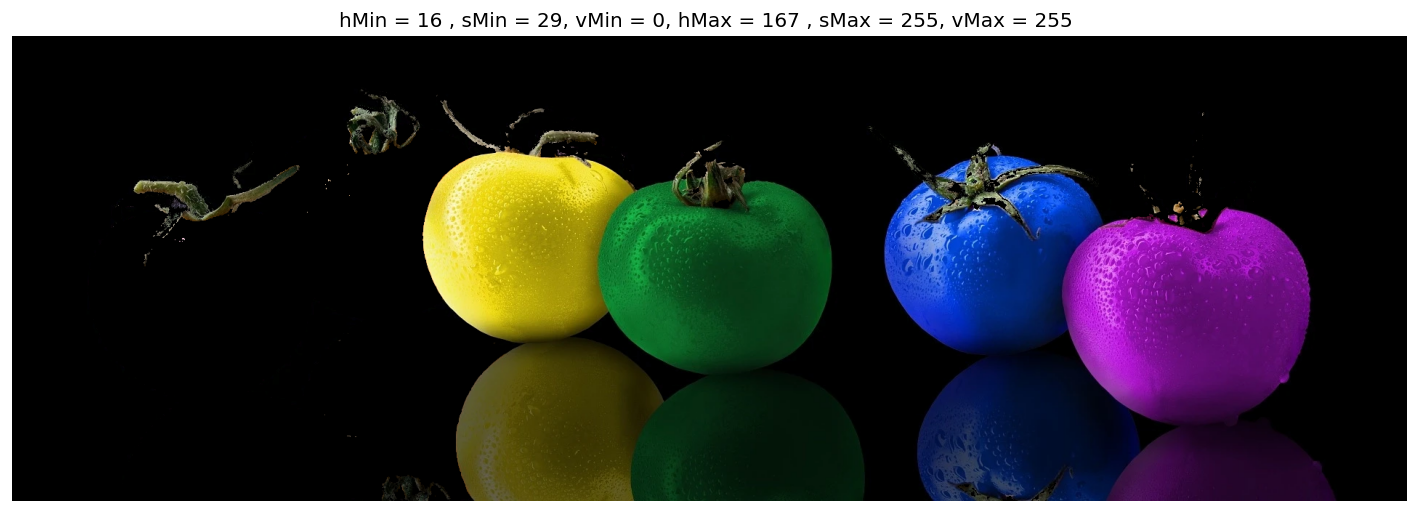

In [4]:
# Example

import numpy as np
import cv2

image = cv2.imread("./images/practice_img/hsv1.webp", cv2.IMREAD_COLOR)

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower = np.array([16, 29, 0])
upper = np.array([167, 255, 255])
mask = cv2.inRange(hsv, lower, upper)
result = cv2.bitwise_and(image, image, mask=mask)

cv2.imshow('result', result)
cv2.waitKey()
cv2.destroyAllWindows()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(15, 15), dpi=120)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)),plt.title('hMin = 16 , sMin = 29, vMin = 0, hMax = 167 , sMax = 255, vMax = 255 ')
plt.axis('off')
plt.show()

## Another way to find HSV 

In [3]:
blue = np.uint8([[[255,0,0 ]]])
green = np.uint8([[[0,255,0 ]]])
red = np.uint8([[[0,0,255 ]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
hsv_red = cv2.cvtColor(red,cv2.COLOR_BGR2HSV)
print(hsv_blue, hsv_green, hsv_red)
# [[[ 60 255 255]]]

[[[120 255 255]]] [[[ 60 255 255]]] [[[  0 255 255]]]


## ▶ addWeighted  

● When detecting color in an image or image, you can limit the part where the color is set by the range setting function (cv2.inRange) of the array element.    
- For example, when trying to detect the red area, the red area is divided into two ranges:   
>- about 0 ~ 5 and about 170 ~ 179.  
- To solve this problem, you need to set the range function of the array element to two ranges and merge the arrays of the two detected elements into one space.  
- This is where the merge array function is used, which is used when merging arrays of two different ranges.  

※ The array merge function can implement alpha blending, so you can display opaque blends of different images.

● 영상이나 이미지에서 색상을 검출 할 때, 배열 요소의 범위 설정 함수(cv2.inRange)로 색상을 설정하는 부분을 제한할수 있습니다.  
- 예를 들어, 빨간색 영역을 검출하려 할 때, 빨간색 영역이 약 0 ~ 5와 약 170 ~ 179으로 범위가 두 가지로 나눠져 있습니다.  
- 이 문제를 해결하려면 배열 요소의 범위 설정 함수를 두 개의 범위로 설정하고 검출한 두 요소의 배열을 병합해서 하나의 공간으로 만들어야 합니다.  
- 이때 배열 병합 함수를 사용하며, 서로 다른 두 범위의 배열을 병합할 때 사용합니다.  

※ 배열 병합 함수는 알파 블렌딩(alpha blending)을 구현할 수 있어 서로 다른 이미지를 불투명하게 혼합해서 표시할 수 있습니다.


~ Example:  
* The red area is divided into two parts, ranging from 0 - 5 and 170 - 179.  
* The array element range setting function allows you to set the range even for multi-channel images at once.  
* Merges two color-separated arrays into one of two arrays entered by the array merge function (cv2.addWeighted).  
>* **dst = cv2.addWeighted(src1, alpha, src2, beta, gamma, dtype = None)**:
>- Calculate the sum of the product of weight1 (alpha) for input image1 (src1) and weight2 (beta) product for input image2 (src2) plus an additional sum (gamma).  
>- Precision (dtype) sets the precision of the output image (dst), and if not assigned, it is assigned with the same precision as input image1.  

* Since the two images will be combined as they are, the values of weight 1 and weight 2 will be used as 1.0, and 0.0 will be assigned as no additional sum will be used.    


    * 빨간색 영역은 0 ~ 5, 170 ~ 179의 범위로 두 부분으로 나뉘어 있습니다.  
    * 배열 요소 범위 설정 함수는 다채널 이미지도 한 번에 범위를 설정할 수 있습니다.  
    * 색상을 분리한 두 배열을 배열 병합 함수(cv2.addWeighted)로 입력된 두 배열의 하나로 병합합니다.  

    * dst = cv2.addWeighted(src1, alpha, src2, beta, gamma, dtype = None):
    - 입력 이미지1(src1)에 대한 가중치1(alpha) 곱과 입력 이미지2(src2)에 대한 가중치2(beta) 곱의 합에 추가 합(gamma)을 더해서 계산합니다.  
    - 정밀도(dtype)은 출력 이미지(dst)의 정밀도를 설정하며, 할당하지 않을 경우, 입력 이미지1과 같은 정밀도로 할당됩니다.  

    * 두 이미지를 그대로 합칠 예정이므로, 가중치1과 가중치2의 값은 1.0으로 사용하고, 추가 합은 사용하지 않으므로 0.0을 할당합니다.

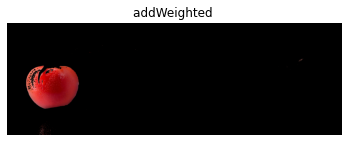

In [5]:
import cv2

src = cv2.imread("./images/practice_img/hsv1.webp", cv2.IMREAD_COLOR)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

lower_red = cv2.inRange(hsv, (0, 100, 100), (5, 255, 255))
upper_red = cv2.inRange(hsv, (170, 100, 100), (180, 255, 255))
added_red = cv2.addWeighted(lower_red, 0.1, upper_red, 1.0, 0.0)

red = cv2.bitwise_and(hsv, hsv, mask = added_red)
red = cv2.cvtColor(red, cv2.COLOR_HSV2BGR)

cv2.imshow("red", red)
cv2.waitKey()
cv2.destroyAllWindows()

plt.imshow(cv2.cvtColor(red, cv2.COLOR_BGR2RGB)),plt.title('addWeighted ')
plt.axis('off')
plt.show()

## ▶ YUV or YCbCr  

The YUV method is also known as the YCbCr method, 
- It is a type of color space used in imaging systems. Y is the luminance component, and Cb and Cr are the chrominance components.
- Y is the brightness (Luma), Luminance refers to the amount of light reflected off the target object - the degree of glare, Luma is a normalization of luminance.
- U is the difference between brightness and color with blue (Chroma Blue, Cb), 
- V stands for brightness and color difference from red (Chroma Red, Cr). 
It has the effect of compressing data by assigning a large number of bits to Y (brightness) and a small number of bits to U (Cb) and V (Cr). 

    YUV 방식은 YCbCr 방식이라고도 하며, 
    - 영상 시스템에서 사용되는 색공간의 일종이다. Y는 휘도 성분이며 Cb 와 Cr 은 색차 성분이다.
    - Y는 밝기(Luma), 휘도 (Luminance)는 대상 물체에 반사되는 빛의 양-눈부심의 정도를 나타내며, Luma는 Luminance를 정규화 한것
    - U는 밝기와 파란색과의 색상 차(Chroma Blue, Cb), 청색 차분 채도 성분 
    - V는 밝기와 빨간색과의 색상 차(Chroma Red, Cr)를 의미합니다. 적색 차분 채도 성분 
    Y(밝기)에는 많은 비트수를 할당하고 U(Cb)와 V(Cr)에는 적은 비트수를 할당하여 데이터를 압축하는 효과를 갖습니다. 

<img src = './images/Y_0.5.png' width=200 height=100>

<center>Y=0.5</center>

In [2]:
# bgr2yuv.py

import cv2
import numpy as np

dark = np.array([[[0,0,0]]], dtype=np.uint8)        # all 3 chnl =  0
middle = np.array([[[127,127,127]]], dtype=np.uint8) # all 3 chnl =  127
bright = np.array([[[255,255,255]]], dtype=np.uint8) # all 3 chnl =  255

dark_yuv = cv2.cvtColor(dark, cv2.COLOR_BGR2YUV) # YUV
middle_yuv = cv2.cvtColor(middle, cv2.COLOR_BGR2YUV)
bright_yuv = cv2.cvtColor(bright, cv2.COLOR_BGR2YUV)

print("YUV_dark:",dark_yuv)
print("YUV_middle:", middle_yuv)
print("YUV_bright", bright_yuv)

YUV_dark: [[[  0 128 128]]]
YUV_middle: [[[127 128 128]]]
YUV_bright [[[255 128 128]]]


● The BGR values are (0, 0, 0), (127, 127, 127), (255, 255, 255), which are the darkest pixels, the medium-brightness pixels, and the brightest pixels.  -> If we convert them to YUV methods, they are (0, 128, 128), (127, 128, 128), and (255, 128, 128), respectively.   
- the first value, Y, means brightness.   
- The second and third values are the same, but only the Y values are changed to 0, 127, and 255.   
- In other words, you can see that it converts from dark to light.

● BGR값은 (0, 0, 0), (127, 127, 127), (255, 255, 255)로 어두운 픽셀, 중간 밝기의 픽셀, 가장 밝은 픽셀입니다.  -> 이를 YUV 방식으로 변환하면 각각 (0, 128, 128), (127, 128, 128), (255, 128, 128)입니다.   
- 맨 처음 값인 Y가 밝기를 뜻한다고 했습니다.   
- 두 번째, 세 번째 값은 동일한데 Y값만 0, 127, 255로 바뀝니다.   
- 즉 어두운 값에서 밝은 값으로 변환하는 것을 볼 수 있습니다. 

※ If you need to pay more attention to brightness, it is wiser to use the YUV method rather than the BGR method  

    ※ 밝기에 좀 더 신경을 써야 한다면 BGR 방식보다 YUV 방식을 사용하는 것이 더 현명한 방법

■ To sum it up, there are four ways to express colors in OpenCV.  

- BGR method, BGRA method, HSV method, YUV method. 
- The BGR method is similar to the traditional RGB method, only the order is reversed. 
- The BGRA method is a method in which an A (alpha) value indicating transparency is added in the BGR method. 
- The HSV method uses hue, saturation, and brightness to express colors, and if you know H, you can grasp the hue to some extent. Therefore, if you want to know the hue at a glance, you can use the HSV method. 
- The YUV method is great when you need to pay more attention to brightness.

    ■ 요약하면 OpenCV에서 색상을 표현하는 방식은 네 가지가 있습니다. 

    - BGR 방식, BGRA 방식, HSV 방식, YUV 방식입니다. 
    - BGR 방식은 전통적인 RGB 방식과 유사하며 그 순서만 반대입니다. 
    - BGRA 방식은 BGR 방식에서 투명도를 나타내는 A(알파) 값이 추가된 방식입니다. 
    - HSV 방식은 색조, 채도, 명도를 이용해서 색상을 표현하는 방식으로 H만 알면 색조는 어느 정도 파악이 가능합니다. 따라서 색조를 한눈에 알고자 한다면 HSV 방식을 사용하면 됩니다. 
    - YUV 방식은 밝기에 더 신경을 써야 하는 경우에 사용하면 좋습니다.

👉 Color space code  

https://www.rapidtables.com/web/color/RGB_Color.html

|Code       |color space     |remarks  
--------|-------|------
|BGR|Blue, Green, Red channel|-
|BGRA|Blue, Green, Red, Alpha channel|-
|RGB|Red, Green, Blue channel|-
|RGBA|Red, Green, Blue, Alpha channel|-
|GRA|Single channel|그레이스케일
|BGR565|Blue, Green, Red channel|16 비트 이미지
|XYZ|X, Y, Z channel|CIE 1931 색 공간
|YCrCb|Y, Cr, Cb channel|YCC (크로마)
|HSV|Hue, Saturation, Value channel|색상, 채도, 명도
|Lab|L, a, b channel|반사율, 색도1, 색도2
|Luv|L, u, v channel|CIE Luv
|HLS|Hue, Lightness, Saturation channel|색상, 밝기, 채도
|YUV|Y, U, V channel|밝기, 색상1, 색상2
|BG, GB, RG|Demosaicing|Single color 공간으로 변경
|_EA|Demosaicing|Edge Recognition
|_VNG|Demosaicing|Using gradients


## § RGBW, and WRGB
https://www.coolblue.nl/en/advice/pixel-structure-televisions.html  
    
The screen of a 4K (UHD) television features an RGB, RGBW, or WRGB pixel structure.   
Each screen has the same number of pixels, but produces color in different ways.   
- An RGBW structure contains both colored and white pixels, for example.    

### § RGB Tv Sceeen  

A TV screen is actually a grid that's made up of a fixed number of pixels per resolution.   
- A 4K screen is 3,840 pixels high and 2,160 pixel wide, for example.   
- In total, this numbers of 8 million pixels.   
- An RGB television fills this grid with rows that consist of 3 pixel colors: red, green, and blue.   
- These rows are repeated until the entire screen is filled.   
- Because each pixel produces a color, the color representation is sharp and realistic.  

### § RGBW Tv Sceeen  

With a RGBW screen, each row of 3 colored pixels is alternated with a white pixel.   
- This means that 25% of the screen is made up of color, but of white light.   
- If you exclude all of these white pixels, the television actually has a resolution of 2,880 by 2,160 pixels.   
- This results in a less realistic color representation and less sharp screen, compared to an RGB television.  

### § WRGB Tv Sceeen  

An OLED screen has its own pixel structure, which is called WRGB.   
- This doesn't have rows with various pixels like RGBW does, but every pixel is the same.   
- These pixels can produce colored and white light individually.   
- That's because each pixel consists of red, green, blue, and white subpixels that are stacked.   
- Thanks to a filter, it only lets through the desired colors.   
- This technology ensures an extra accurate color representation.   
- The disadvantage of this technology is that the colors become a bit dull with a high brightness.
